## setup

In [1]:
import pandas as pd, numpy as np
import country_converter as coco

In [36]:
# import full quasi-sentence data 
qs = pd.read_csv('~/Documents/eiee/capable/manifestos/rep_package/data/policlim_full_qs_2025-17-06.csv',dtype={'cmp_code_clean':'str','cmp_code_orig':'str'})

# remove the short ones, headings, boxes, intro
qs = qs[qs['keep']==1]

C:\Users\Sanford\AppData\Local\Temp\ipykernel_51864\3265325669.py:2: DtypeWarning: Columns (4,13,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv('~/Documents/eiee/capable/manifestos/rep_package/data/policlim_full_qs_2025-17-06.csv',dtype={'cmp_code_clean':'str','cmp_code_orig':'str'})


['Do 2015 roku całkowita po-jemność magazynów gazowych wzrośnie z obec-nego 1,66 mld m³ do ponad 3 mld m³, a długość  gazociągów zwiększy się o 1 tys km']

In [4]:
qs.columns.tolist()

['qs_id',
 'party',
 'country',
 'year',
 'edate',
 'language',
 'cmp_code_clean',
 'climate',
 'partyname',
 'manifesto_id',
 'parfam',
 'parfam_name',
 'original_text',
 'prob_climate',
 'iso3',
 'text_en',
 'word_count',
 'cmp_code_orig',
 'keep']

In [27]:
# import manifesto-level data 
man = pd.read_csv('~/Documents/eiee/capable/manifestos/rep_package/data/policlim_full_man_2025-18-06.csv')

In [29]:
man.columns.tolist()

['manifesto_id',
 'climate',
 'country',
 'countryname',
 'oecdmember',
 'eumember',
 'edate',
 'date',
 'party',
 'partyname',
 'partyabbrev',
 'parfam',
 'candidatename',
 'coderid',
 'manual',
 'coderyear',
 'testresult',
 'testeditsim',
 'pervote',
 'voteest',
 'presvote',
 'absseat',
 'totseats',
 'progtype',
 'datasetorigin',
 'corpusversion',
 'total',
 'peruncod',
 'per101',
 'per102',
 'per103',
 'per104',
 'per105',
 'per106',
 'per107',
 'per108',
 'per109',
 'per110',
 'per201',
 'per202',
 'per203',
 'per204',
 'per301',
 'per302',
 'per303',
 'per304',
 'per305',
 'per401',
 'per402',
 'per403',
 'per404',
 'per405',
 'per406',
 'per407',
 'per408',
 'per409',
 'per410',
 'per411',
 'per412',
 'per413',
 'per414',
 'per415',
 'per416',
 'per501',
 'per502',
 'per503',
 'per504',
 'per505',
 'per506',
 'per507',
 'per601',
 'per602',
 'per603',
 'per604',
 'per605',
 'per606',
 'per607',
 'per608',
 'per701',
 'per702',
 'per703',
 'per704',
 'per705',
 'per706',
 'per1011

In [28]:
## MANIFESTOS AGGREGATED USING THE FOLLOWING CODE 

## First load in master mpd dataset with all the scores per manifesto
# cmp = pd.read_csv('~/Documents/eiee/capable/manifestos/202401_CMP.csv')

## create manifesto id variable 
# cmp['manifesto_id']=[str(r['party'])+'_'+str(r['date']) for _,r in cmp.iterrows()]

## calculate the Lowe et al RILE scores 

# left = ['per401','per402','per501','per416','per403','per404','per406','per412','per413','per504','per506','per701','per504','per506','per103','per105','per106','per107','per202','per403',
#        'per404','per406','per412','per413','per504','per506','per701','per403','per404','per412','per103','per105','per106','per107','per202']

#right = ['per403','per412','per413','per415','per410','per401','per402','per407','per414','per505','per505','per507','per104','per201','per203','per305','per401','per401','per407','per414',
#         'per505','per601','per603','per605','per606','per401','per414','per104','per201','per203','per305','per601','per603','per605','per606']

# cmp['lowe_rile']=(np.log(((cmp[right].sum(axis=1)/100)*cmp['total'])+.5)-np.log(((cmp[left].sum(axis=1)/100)*cmp['total'])+.5))
## cmp['lowe_rile_base']=np.log(cmp[right].sum(axis=1)+.5)-np.log(cmp[left].sum(axis=1)+.5)

# cmp['std_rile']=(cmp['rile']-cmp['rile'].mean())/cmp['rile'].std()
# cmp['std_lowe_rile']=(cmp['lowe_rile']-cmp['lowe_rile'].mean())/cmp['lowe_rile'].std()
# cmp[['std_rile','std_lowe_rile']]

# cmp['std_diff_rile']=cmp['std_rile']-cmp['std_lowe_rile']
# cmp['std_diff_rile'].describe()

## group the quasisentences into their manifestos
# newm = qs.groupby(['country','language','partyname','manifesto_id','parfam_name']).mean(numeric_only=True)[['party',
#                                                                    'parfam','climate','year']].reset_index()

## Merge all other meta data from master MPD file 
# merged = newm[['manifesto_id','climate']].merge(cmp,on='manifesto_id')

## Create parfam_name variable based on MPD party family codes
# parfam_name_dict = {
#    10: 'ECO',
#    20: 'LEF',
#    30: 'SOC',
#    40: 'LIB',
#    50: 'CHR',
#    60: 'CON',
#    70: 'NAT',
#    80: 'AGR',
#    90: 'ETH',
#    95: 'SIP',
#    98: 'DIV',
#    999: 'MI'
#}
# merged['parfam_name']=[parfam_name_dict[code] for code in merged['parfam']]

## create year variable
# merged['year']=[int(str(i).split('_')[1][:4]) for i in merged['manifesto_id']]

## create country code iso3
# cc = coco.CountryConverter()
# merged['iso3'] = cc.pandas_convert(series=merged['countryname'], to='ISO3')   


In [6]:
man.columns.tolist()

['manifesto_id',
 'climate',
 'country',
 'countryname',
 'oecdmember',
 'eumember',
 'edate',
 'date',
 'party',
 'partyname',
 'partyabbrev',
 'parfam',
 'candidatename',
 'coderid',
 'manual',
 'coderyear',
 'testresult',
 'testeditsim',
 'pervote',
 'voteest',
 'presvote',
 'absseat',
 'totseats',
 'progtype',
 'datasetorigin',
 'corpusversion',
 'total',
 'peruncod',
 'per101',
 'per102',
 'per103',
 'per104',
 'per105',
 'per106',
 'per107',
 'per108',
 'per109',
 'per110',
 'per201',
 'per202',
 'per203',
 'per204',
 'per301',
 'per302',
 'per303',
 'per304',
 'per305',
 'per401',
 'per402',
 'per403',
 'per404',
 'per405',
 'per406',
 'per407',
 'per408',
 'per409',
 'per410',
 'per411',
 'per412',
 'per413',
 'per414',
 'per415',
 'per416',
 'per501',
 'per502',
 'per503',
 'per504',
 'per505',
 'per506',
 'per507',
 'per601',
 'per602',
 'per603',
 'per604',
 'per605',
 'per606',
 'per607',
 'per608',
 'per701',
 'per702',
 'per703',
 'per704',
 'per705',
 'per706',
 'per1011

In [34]:
qs.manifesto_id.unique().shape

(1792,)

<Axes: >

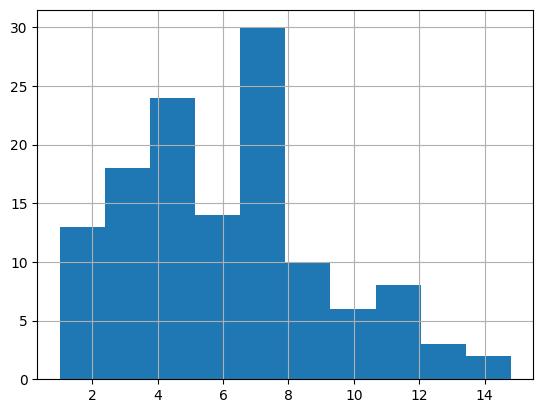

In [35]:
man.query('parfam_name =="ECO"')

## summary stats

In [7]:
# count and proporption climate relevant
print(qs.climate.value_counts())
print(qs.climate.value_counts(normalize=True))

climate
0.0    1736041
1.0      95253
Name: count, dtype: int64
climate
0.0    0.947986
1.0    0.052014
Name: proportion, dtype: float64


In [16]:
# Create dummies for 501 and 416 for comparison with climate variable 
qs['501'] = (qs['cmp_code_clean'] == '501.0').astype(int)
qs['416'] = qs['cmp_code_clean'].isin(['416.0', '416.1', '416.2']).astype(int)


In [17]:
# How many 501 and 416?
qs['501'].value_counts(normalize=True)[1]+qs['416'].value_counts(normalize=True)[1]

np.float64(0.08403129153483821)

## Table 2: Overlap between our measure of climate salience and Manifesto Project variables 

In [18]:
ct = pd.crosstab(qs['cmp_code_clean'],qs['climate'],normalize='columns').sort_values(1,ascending=False)
ct[:15]


climate,0.0,1.0
cmp_code_clean,,
501.0,0.042551,0.288106
411.0,0.071980,0.143733
416.2,0.011361,0.141024
416.0,0.007201,0.062507
403.0,0.033875,0.046214
107.0,0.023809,0.021438
410.0,0.017782,0.021207
408.0,0.011726,0.020892
504.0,0.104284,0.018299


## Table A1: Proportion of manifesto quasi-sentences by language

In [19]:
qs_lang = qs.language.value_counts(normalize=True).sort_values(ascending=False)
qs_lang = pd.DataFrame(qs_lang)
for i,r in qs_lang.iterrows():
    #print(i,r['proportion'])
    print(f"{i.capitalize()} & {np.round(r['proportion'],3)} \\\\")

Spanish & 0.188 \\
Dutch & 0.137 \\
English & 0.127 \\
German & 0.096 \\
French & 0.086 \\
Portuguese & 0.056 \\
Norwegian & 0.052 \\
Greek & 0.024 \\
Hungarian & 0.023 \\
Lithuanian & 0.023 \\
Italian & 0.021 \\
Slovenian & 0.02 \\
Slovak & 0.016 \\
Polish & 0.015 \\
Croatian & 0.015 \\
Catalan & 0.014 \\
Swedish & 0.014 \\
Czech & 0.013 \\
Finnish & 0.013 \\
Danish & 0.012 \\
Hebrew & 0.011 \\
Estonian & 0.008 \\
Bulgarian & 0.006 \\
Romanian & 0.006 \\
Galician & 0.003 \\
Latvian & 0.001 \\


## Table A4: Per country: proportion of manifesto quasi-sentences, number of manifestos, parties, and elections.

In [20]:
# Group by 'country'
grouped = qs.groupby('country')

# Aggregate the unique counts for parties, manifestos, and elections
country_stats = grouped.agg({'qs_id':'nunique','party': 'nunique', 'manifesto_id': 'nunique', 'year': 'nunique'})

# Rename the columns for clarity
country_stats.columns = ['QS proportion','Parties', 'Manifestos', 'Elections']

# Reset index to make 'country' a regular column
country_stats.reset_index(inplace=True)


In [21]:
for i,r in country_stats.iterrows():
    print(f"{r['country']} & {np.round(r['QS proportion'],4)} & {r['Manifestos']} & {r['Parties']} & {r['Elections']} \\\\")

Argentina & 15158 & 34 & 24 & 9 \\
Australia & 53726 & 45 & 7 & 12 \\
Austria & 43768 & 49 & 10 & 10 \\
Belgium & 213978 & 82 & 22 & 8 \\
Bolivia & 5187 & 6 & 4 & 2 \\
Brazil & 37472 & 26 & 11 & 8 \\
Bulgaria & 11799 & 23 & 13 & 5 \\
Canada & 38574 & 37 & 8 & 9 \\
Chile & 51692 & 27 & 15 & 7 \\
Colombia & 16620 & 23 & 17 & 5 \\
Costa Rica & 43530 & 29 & 8 & 8 \\
Croatia & 27578 & 49 & 27 & 7 \\
Cyprus & 10242 & 20 & 9 & 3 \\
Czech Republic & 23762 & 31 & 13 & 5 \\
Denmark & 22453 & 76 & 13 & 9 \\
Dominican Republic & 14791 & 8 & 3 & 6 \\
Ecuador & 11309 & 20 & 9 & 6 \\
Estonia & 15133 & 24 & 8 & 5 \\
Finland & 23761 & 61 & 10 & 8 \\
France & 22218 & 44 & 16 & 6 \\
Germany & 91572 & 47 & 10 & 9 \\
Greece & 33401 & 49 & 16 & 7 \\
Hungary & 42668 & 26 & 12 & 7 \\
Ireland & 51672 & 48 & 15 & 7 \\
Israel & 20267 & 42 & 17 & 8 \\
Italy & 38304 & 68 & 42 & 7 \\
Latvia & 1568 & 30 & 17 & 5 \\
Lithuania & 41767 & 42 & 21 & 6 \\
Luxembourg & 30017 & 17 & 6 & 3 \\
Mexico & 25150 & 25 & 8 & 6 \\
N

In [24]:
# inspect samples

x = '81711_202007_1425'
end = int(x.split('_')[2])
for i in range(end-5,end+10):
    base = x.split('_')[0]+'_'+x.split('_')[1]
    target = str(base)+'_'+str(i)
    print(target)
    #print(qs[qs['qs_id']==str(base)+'_0'+str(i)]['original_text'].tolist())
    print(qs[qs['qs_id']==str(base)+'_'+str(i)]['original_text'].tolist())

81711_202007_1420
['Uložit  ćemo  45  milijuna  eura  u  akvakulturu  i  na  taj  način  povećati  proizvodnju  za oko 25%.']
81711_202007_1421
['Uložit ćemo u diversifikaciju i dodavanje više vrijednosti proizvodima ribarstva,']
81711_202007_1422
['a održivim upravljanjem resursima smanjit ćemo pritisak na raspoložive resurse bez restriktivnih mjera za naše ribare.']
81711_202007_1423
[]
81711_202007_1424
[]
81711_202007_1425
['i tranzicija na čistu energiju.']
81711_202007_1426
['Energetski sektor zadnjih godina bilježi velike promjene, prvenstveno vezane za nje- govu dekarbonizaciju']
81711_202007_1427
['i veće usmjeravanje na obnov- ljive izvore energije']
81711_202007_1428
['i korištenje čistih tehnologija.']
81711_202007_1429
['Europski zeleni plan, koji bi u sljedećih deset godi- na trebao mobilizirati najmanje tisuću milijardi eura ulaganja u zaštitu okoliša i klime, prilika je za ubr- zanu energetsku tranziciju Hrvatske prema čistim energijama.']
81711_202007_1430
['Naš je cil

In [37]:
# look at green party qs

In [38]:
qs.parfam_name.value_counts()

parfam_name
SOC    376363
CON    266085
LIB    236669
LEF    227758
CHR    213840
ECO    155948
NAT    131235
ETH    122987
SIP     60516
AGR     34314
MI       2991
DIV      2588
Name: count, dtype: int64

In [43]:
eco = qs.query('parfam_name == "ECO"')

In [48]:
eco.query('climate == 1').sample(10, random_state=50).original_text.tolist()

['Unser Alternativvorschlag: Ausbau der Verbindung Hamburg–Berlin zu einer ICE-Strecke',
 'Zlepšení ovzduší ve městech a zároveň snížení závislosti na ropě chceme dosáhnout preferencí dopravy v\xa0elektrické trakci – tramvají, trolejbusů a městských vlaků.',
 'On aeg alustada ulatuslike investeerimistoetustega soojus- ja elektrienergia tootmiseks kodude, koolide, haiglate ja muude avalike asutuste juures, finantsallikaks kasutades ennekõike CO2 kaubandusest saadavat tulu.',
 '(5) aanpassing van het Stabiliteitspact in ecologische zin.',
 'Ezen belül azonban a téli időszakban a csapadék mennyisége nő, miközben nyáron jelentősen csökken.',
 'en voorkomen we aardbevingen in Groningen.',
 'A partir de este punto, la producción comenzó a declinar hasta alcanzar 2,548 mil barriles por día (Mbd) en 2012, de los cuales 54% correspondió a crudo pesado, 33% crudo ligero y 13% superligero.',
 'Or, toute notre économie dépend actuellement des énergies fossiles.',
 'La política productiva se adelan

In [49]:
rt = qs.query('parfam_name == "CON" | parfam_name == "NAT"')

In [50]:
rt.shape

(397320, 20)

In [53]:
rt.query('climate == 1').sample(10, random_state=30).original_text.tolist()

['We oppose federal funding of embryonic stem cell research.',
 'Fremskritts-partiet mener det må være opp til utbygger  selv å bestemme om man i et kvotesystem  ønsker å implementere CO2 -håndterings-teknologi eller kjøpe utslippskvoter for å  møte eventuelle utslippskrav.',
 'Nasza wizja rozwoju energetyki jest oparta na trzech filarach: Bezpieczeństwo dostaw energii',
 '7.5 Povečali bomo učinkovitost rabe energije',
 'Samtidigt är det viktigt att kontinuerligt analysera den framtida kostnadsutvecklingen för elcertifikaten',
 '342.Reforzaremos las funciones de vigilancia de la competencia de los mercados energéticos correspondientes a los organismos independientes y la Administración General del Estado.',
 'Toinen kummajainen YK:n ilmastopolitiikassa on ns. teollisuusmaiden omantunnonrahaston kerääminen.',
 'Continue our $347 million Warm Up New Zealand: Heat Smart scheme to retrofit at least 188,500 privately owned homes.',
 'Warm Up  New Zealand: Heat Smart:  Upgrade  188,500  home

In [52]:
qs[qs['original_text']=='By increasing our American energy supply and decreasing the long term demand for oil, we will be well positioned to address the challenge of climate change and continue our longstanding responsibility for stewardship over the environment.']

,qs_id,party,country,year,edate,language,cmp_code_clean,climate,partyname,manifesto_id,parfam,parfam_name,original_text,prob_climate,iso3,text_en,word_count,cmp_code_orig,partyabbrev,keep
1638218,61620_200811_0736,61620,United States,2008,200811,english,501.0,1.0,Republican Party,61620_200811,60,CON,By increasing our American energy supply and d...,0.9992985917123008,USA,NaN,36,501.0,Republicans,1
